In [2]:
# Import SQLAlchemy and other dependencies

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Float, Date
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect
from sqlalchemy import desc, func, subquery
from sqlalchemy.sql import func
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
from flask import Flask, jsonify


In [3]:
# Create Database Connection
# ----------------------------------
# Establish Connection to database
engine = create_engine(f'sqlite:///hawaii.sqlite')

# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

inspector = inspect(engine)

inspector.get_table_names()

['measurement', 'station']

In [4]:
Base.classes.keys()

['measurement', 'station']

In [5]:
# Start a session

session = Session(engine)

# Save reference to the table
measurement = Base.classes.measurement

station = Base.classes.station

In [6]:
list(station.__table__.columns)
list(measurement.__table__.columns)

[Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False),
 Column('station', VARCHAR(length=255), table=<measurement>),
 Column('date', DATE(), table=<measurement>),
 Column('prcp', FLOAT(), table=<measurement>),
 Column('tobs', INTEGER(), table=<measurement>)]

In [7]:
# query the date and precipitation values for the last 12 months

query_db = (session
         .query(measurement.date, measurement.prcp)
         .filter(measurement.date.between('2016-08-23','2017-08-23'))
           .all())
                

In [8]:
for row in query_db:
    print(row)

(datetime.date(2016, 8, 23), 0.0)
(datetime.date(2016, 8, 24), 0.08)
(datetime.date(2016, 8, 25), 0.08)
(datetime.date(2016, 8, 26), 0.0)
(datetime.date(2016, 8, 27), 0.0)
(datetime.date(2016, 8, 28), 0.01)
(datetime.date(2016, 8, 29), 0.0)
(datetime.date(2016, 8, 30), 0.0)
(datetime.date(2016, 8, 31), 0.13)
(datetime.date(2016, 9, 1), 0.0)
(datetime.date(2016, 9, 2), 0.0)
(datetime.date(2016, 9, 3), 0.0)
(datetime.date(2016, 9, 4), 0.03)
(datetime.date(2016, 9, 7), 0.05)
(datetime.date(2016, 9, 8), 0.0)
(datetime.date(2016, 9, 9), 0.03)
(datetime.date(2016, 9, 10), 0.0)
(datetime.date(2016, 9, 11), 0.05)
(datetime.date(2016, 9, 12), 0.0)
(datetime.date(2016, 9, 13), 0.02)
(datetime.date(2016, 9, 14), 1.32)
(datetime.date(2016, 9, 15), 0.42)
(datetime.date(2016, 9, 16), 0.06)
(datetime.date(2016, 9, 17), 0.05)
(datetime.date(2016, 9, 18), 0.0)
(datetime.date(2016, 9, 19), 0.0)
(datetime.date(2016, 9, 20), 0.0)
(datetime.date(2016, 9, 21), 0.0)
(datetime.date(2016, 9, 22), 0.02)
(dateti

(datetime.date(2017, 8, 3), 0.0)
(datetime.date(2017, 8, 4), 0.0)
(datetime.date(2017, 8, 6), 0.0)
(datetime.date(2017, 8, 7), 0.0)
(datetime.date(2017, 8, 8), 0.0)
(datetime.date(2017, 8, 10), 0.0)
(datetime.date(2017, 8, 11), 0.0)
(datetime.date(2017, 8, 12), 0.0)
(datetime.date(2017, 8, 13), 0.0)
(datetime.date(2017, 8, 14), 0.08)
(datetime.date(2017, 8, 15), 0.06)
(datetime.date(2017, 8, 16), 0.07)
(datetime.date(2017, 8, 17), 0.05)
(datetime.date(2017, 8, 22), 0.0)
(datetime.date(2017, 8, 23), 0.08)
(datetime.date(2016, 8, 23), 1.79)
(datetime.date(2016, 8, 24), 2.15)
(datetime.date(2016, 8, 25), 0.06)
(datetime.date(2016, 8, 26), 0.01)
(datetime.date(2016, 8, 27), 0.12)
(datetime.date(2016, 8, 28), 0.6)
(datetime.date(2016, 8, 29), 0.35)
(datetime.date(2016, 8, 30), 0.0)
(datetime.date(2016, 8, 31), 0.24)
(datetime.date(2016, 9, 1), 0.02)
(datetime.date(2016, 9, 2), 0.01)
(datetime.date(2016, 9, 3), 0.12)
(datetime.date(2016, 9, 4), 0.14)
(datetime.date(2016, 9, 5), 0.03)
(dateti

In [9]:
# save query to a data frame    
climate_data = pd.DataFrame(query_db)

In [10]:
#set date as the index

#climate_data = climate_data.set_index('date')

climate_data.head()

#sort the data via date so plot is in sequence

climate_data_rev = climate_data.sort_values(by=['date'])
climate_data_rev = climate_data_rev.reset_index(drop=True)
climate_data_rev.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.02
2,2016-08-23,0.05
3,2016-08-23,0.70
4,2016-08-23,0.15


In [11]:
# plot the data as a line graph

x_values = np.arange(0, len(climate_data), 1)

date_data = climate_data_rev['date']
prcp_data = climate_data_rev['prcp']

len(prcp_data)

2021

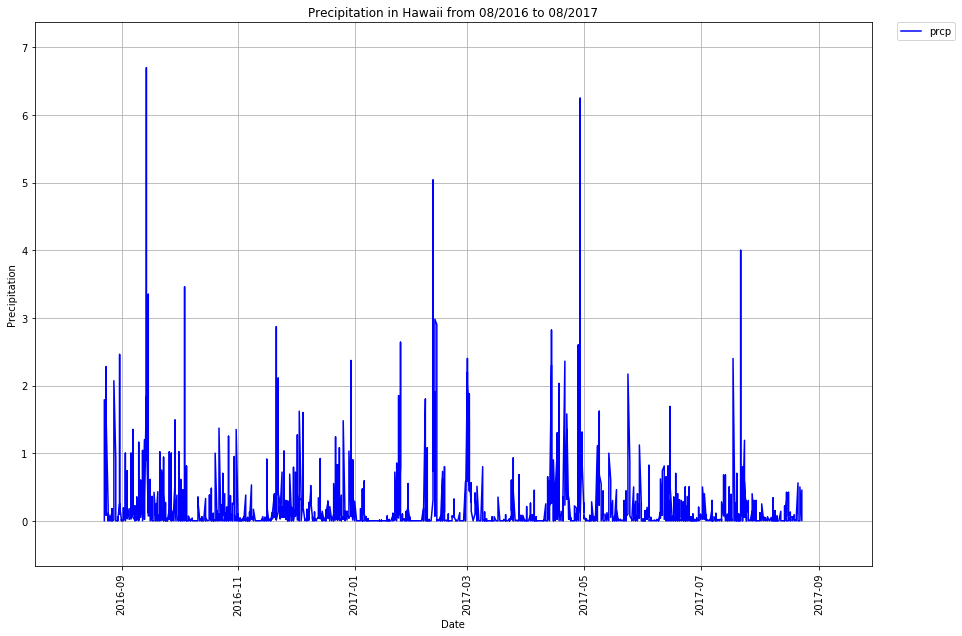

In [12]:
# plot the line graph

plt.figure(figsize=(15, 10))
plt.plot(date_data, prcp_data, color='blue')
plt.title("Precipitation in Hawaii from 08/2016 to 08/2017")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.xticks(rotation='vertical')
plt.margins(0.1)
plt.legend(bbox_to_anchor=(1.03 , 1), loc=2, borderaxespad=0.)
plt.grid()
plt.savefig("Precipitation.png")
plt.show()

In [13]:
# Station Analysis

# Count the number of stations

count_query = (session
               .query(func.count(station.station)
                ).all())
               
print(count_query)

[(9,)]


In [14]:
# List the stations and observation counts in descending order

#station_descending = [measurement.station, func.count(measurement.date)]

station_descending = (session.query(measurement.station.label('station_name'), func.count(measurement.date).label('station_counts'))
                      .group_by(measurement.station)
                      .order_by(func.count(measurement.date).desc())
                     .all())

station_descending

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [15]:
# List the station with the highest number of observations
# <need to solve this> (solved using data frame)

station_desc_df = pd.DataFrame(station_descending)

station_desc_df.head()

max_station = station_desc_df['station_name'][0]
max_station

'USC00519281'

In [16]:
# Design a query to retrieve the last 12 months of tobs
# Filter by the station with the highest number of observations
# Plot the results as a histogram with bins=12

# query the station with the most number of tobs data

query_tobs = (session.query(measurement.station, func.count(measurement.tobs).label('sums_tobs'))
               .group_by(measurement.station)
                .order_by(func.count(measurement.tobs).desc())
                .all()
              )

query_tobs

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [17]:
# identify the station with the highest number of total tobs

query_tobs_df = pd.DataFrame(query_tobs)
query_tobs_df.head()

max_station_tobs = query_tobs_df["station"][0]
max_station_tobs

'USC00519281'

In [18]:
# run a query of the last 12 months of tobs on the station with the most data

query_tobs_max = (session.query(measurement.station, measurement.date, measurement.tobs)
                .order_by(measurement.date)
                .filter(measurement.date.between('2016-08-23','2017-08-23'))
                .filter(measurement.station==max_station_tobs)
                .all()
              )

query_tobs_max

[('USC00519281', datetime.date(2016, 8, 23), 77),
 ('USC00519281', datetime.date(2016, 8, 24), 77),
 ('USC00519281', datetime.date(2016, 8, 25), 80),
 ('USC00519281', datetime.date(2016, 8, 26), 80),
 ('USC00519281', datetime.date(2016, 8, 27), 75),
 ('USC00519281', datetime.date(2016, 8, 28), 73),
 ('USC00519281', datetime.date(2016, 8, 29), 78),
 ('USC00519281', datetime.date(2016, 8, 30), 77),
 ('USC00519281', datetime.date(2016, 8, 31), 78),
 ('USC00519281', datetime.date(2016, 9, 1), 80),
 ('USC00519281', datetime.date(2016, 9, 2), 80),
 ('USC00519281', datetime.date(2016, 9, 3), 78),
 ('USC00519281', datetime.date(2016, 9, 4), 78),
 ('USC00519281', datetime.date(2016, 9, 5), 78),
 ('USC00519281', datetime.date(2016, 9, 6), 73),
 ('USC00519281', datetime.date(2016, 9, 7), 74),
 ('USC00519281', datetime.date(2016, 9, 8), 80),
 ('USC00519281', datetime.date(2016, 9, 9), 79),
 ('USC00519281', datetime.date(2016, 9, 10), 77),
 ('USC00519281', datetime.date(2016, 9, 11), 80),
 ('USC005

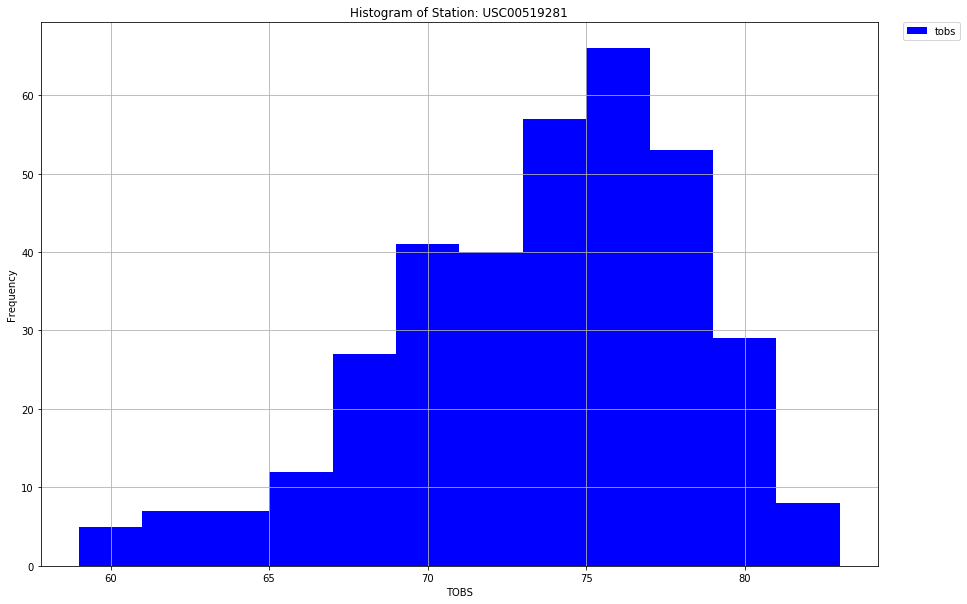

In [19]:
# convert the query to a dataframe and save the tobs values

query_tobs_df = pd.DataFrame(query_tobs_max)

query_tobs_df.head()

tobs_data = query_tobs_df['tobs']

# plot the histogram 

plt.figure(figsize=(15, 10))
plt.hist(tobs_data, bins=12, color="blue", label="tobs")
plt.grid()
plt.title("Histogram of Station: " + max_station_tobs)
plt.xlabel("TOBS")
plt.ylabel("Frequency")
plt.legend(bbox_to_anchor=(1.03 , 1), loc=2, borderaxespad=0.)
plt.savefig("Histogram_plot.png")
plt.show()

In [20]:
#Temperature Analysis Function

def calc_temps(start_date, end_date):

    # define the variables for the new dates which are 1 year prior to the desired dates
    
    new_start_date = datetime.datetime.strptime(start_date, "%Y-%m-%d")- datetime.timedelta(days=365.25)
    new_end_date = datetime.datetime.strptime(end_date, "%Y-%m-%d")- datetime.timedelta(days=365.25)
 
    print("Start Date: " + str(start_date))
    print("Reference Start Date: " + str(new_start_date))
    print("End Date: " + str(end_date))
    print("Reference End Date: " + str(new_end_date))
    
    # run a query on tobs using the updated dates
    
    query_tobs_data = (session.query(measurement.tobs)
                .filter(measurement.date.between(new_start_date, new_end_date))
                .all()
              )
    # convert query to a data frame
    
    query_tobs_data_df = pd.DataFrame(query_tobs_data)
    
    # identify the key values needed to plot info
    
    min_tobs = query_tobs_data_df.min()
    max_tobs = query_tobs_data_df.max()
    avg_tobs = query_tobs_data_df.mean()
    tmin_tobs = max_tobs - min_tobs
        
    # plot the bar chart with key values
    
    plt.figure(figsize=(3, 5))
    plt.bar(1, avg_tobs, color="blue", yerr=tmin_tobs)
    plt.grid()
    plt.title("Trip Average Temp")
    plt.ylabel("Temp (F)")
    plt.tick_params(axis='both', top='off', right='off', 
                bottom='off', labeltop='off', labelright='off', labelbottom='off')
    plt.savefig("TempAvg.png")
    plt.show()

Welcome to the Hawaii Temperature Tool!
Please enter the first day of your planned trip using format (yyyy-mm-dd): 2018-06-15
Then enter the end date of your trip (yyyy-mm-dd): 2018-06-16
Start Date: 2018-06-15
Reference Start Date: 2017-06-14 18:00:00
End Date: 2018-06-16
Reference End Date: 2017-06-15 18:00:00


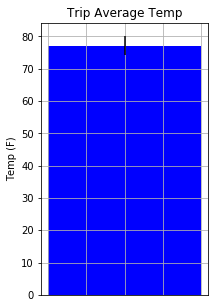

In [72]:
# Run the function with customer input

print("Welcome to the Hawaii Temperature Tool!")

date1 = input("Please enter the first day of your planned trip using format (yyyy-mm-dd): ")
date2 = input("Then enter the end date of your trip (yyyy-mm-dd): ")

calc_temps(date1, date2)

In [92]:
# Climate App - Step 4

# run a query of the last 12 months of tobs on the station with the most data

query_climate_app = (session.query(measurement.date, measurement.tobs)
                .order_by(measurement.date)
                .filter(measurement.date.between('2016-08-23','2017-08-23'))
                .all()
              )

query_climate_app

[(datetime.date(2016, 8, 23), 81),
 (datetime.date(2016, 8, 23), 76),
 (datetime.date(2016, 8, 23), 80),
 (datetime.date(2016, 8, 23), 80),
 (datetime.date(2016, 8, 23), 77),
 (datetime.date(2016, 8, 23), 74),
 (datetime.date(2016, 8, 24), 79),
 (datetime.date(2016, 8, 24), 76),
 (datetime.date(2016, 8, 24), 80),
 (datetime.date(2016, 8, 24), 79),
 (datetime.date(2016, 8, 24), 77),
 (datetime.date(2016, 8, 24), 74),
 (datetime.date(2016, 8, 25), 80),
 (datetime.date(2016, 8, 25), 77),
 (datetime.date(2016, 8, 25), 81),
 (datetime.date(2016, 8, 25), 81),
 (datetime.date(2016, 8, 25), 80),
 (datetime.date(2016, 8, 25), 80),
 (datetime.date(2016, 8, 25), 77),
 (datetime.date(2016, 8, 26), 79),
 (datetime.date(2016, 8, 26), 78),
 (datetime.date(2016, 8, 26), 81),
 (datetime.date(2016, 8, 26), 81),
 (datetime.date(2016, 8, 26), 84),
 (datetime.date(2016, 8, 26), 80),
 (datetime.date(2016, 8, 27), 77),
 (datetime.date(2016, 8, 27), 73),
 (datetime.date(2016, 8, 27), 81),
 (datetime.date(2016

In [28]:
# Precipitation 

#################################################
# Flask Setup
#################################################
app = Flask(__name__)

@app.route("/")
def welcome():
    """List all available api routes."""
    return (
        f"Available Routes:<br/>"
        f"/api/v1.0/precipitation<br/>"
        f"/api/v1.0/tobs<br/>"
        f"/api/v1.0/<start> and /api/v1.0/<start>/<end><br/>"
    )

@app.route("/api/v1.0/precipitation")
def precipitation():
    """Return a list of dates and temperature data
    """
    # Query required columns
    query_climate_app = (session.query(measurement.date, measurement.tobs)
                .order_by(measurement.date)
                .filter(measurement.date.between('2016-08-23','2017-08-23'))
                .all()
              )
    # Create a dictionary from the row data and append to a list of
 
    precip_data = []
    for result in query_climate_app:
        precip_dict = {}
        precip_dict["date"] = meaurement.date
        precip_dict["tobs"] = measurement.tobs
        precip_data.append(precip_dict)
        
    return jsonify(precip_data)

#if __name__ == '__main__':
#    app.run(debug=True)

In [27]:
# Stations

@app.route("/api/v1.0/station")
def station():
    """Return a list of stations
    """
    # Query all passengers
    query_station_app = (session.query(station).all())        
        
    # Create a dictionary from the row data and append to a list of
    # station data
    
    station_data = []
    for result in query_station_app:
        station_dict = {}
        station_dict["station"] = station.station
        station_dict["address"] = station.name
        station_dict["latitude"] = station.latitude
        station_dict["longitude"] = station.longitude
        station_dict["elevation"] = station.elevation
       
        station_data.append(station_dict)
        
    return jsonify(station_data)

In [30]:
# Tobs

@app.route("/api/v1.0/tobs")
def tobs():
    """Return a list of temperature data
    """
    # Query required columns
    query_tobs_app = (session.query(measurement.tobs)
                .order_by(measurement.tobs)
                .filter(measurement.date.between('2016-08-23','2017-08-23'))
                .all()
              )
    # Create a dictionary from the row data and append to a list of
 
    tobs_data = []
    for result in query_climate_app:
        tobs_dict = {}
        tobs_dict["tobs"] = meaurement.tobs
        tobs_data.append(tobs_dict)
        
    return jsonify(tobs_data)

In [31]:
# Between Dates

@app.route("/api/v1.0/<start>/<end>")
def temp_between_dates(start, end):
    """Return a list of temperature data between dates
    """
    # Query required columns
    query_temps = (session.query(measurement.tobs)
                .order_by(measurement.tobs)
                .filter(measurement.date.between(start,end))
                .all()
              )
    
    # convert query to a data frame
    
    query_temps_df = pd.DataFrame(query_temps)
    
    # identify the key values needed to plot info
    
    min_tobs = query_temps_df.min()
    max_tobs = query_temps_df.max()
    avg_tobs = query_temps.mean()
    
    # Create a dictionary from the row data and append to a list of
 
    tobs_data = []
    tobs_dict = {}
    tobs_dict["min"] = min_tobs
    tobs_dict["max"] = max_tobs
    tobs_dict["avg"] = avg_tobs    
    tobs_data.append(tobs_dict)
        
    return jsonify(tobs_data)

In [32]:
# Start Date Temps

@app.route("/api/v1.0/<start>")
def temp_dates(start):
    """Return a list of temperature data with a start date
    """
    # Query required columns
    query_temps = (session.query(measurement.tobs)
                .order_by(measurement.tobs)
                .filter(measurement.date >= start)
                .all()
              )
    
    # convert query to a data frame
    
    query_temps_df = pd.DataFrame(query_temps)
    
    # identify the key values needed to plot info
    
    min_tobs = query_temps_df.min()
    max_tobs = query_temps_df.max()
    avg_tobs = query_temps.mean()
    
    # Create a dictionary from the row data and append to a list of
 
    tobs_data = []
    tobs_dict = {}
    tobs_dict["min"] = min_tobs
    tobs_dict["max"] = max_tobs
    tobs_dict["avg"] = avg_tobs    
    tobs_data.append(tobs_dict)
        
    return jsonify(tobs_data)